In [264]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
from statsmodels.iolib.summary2 import summary_col

In [193]:
df = pd.read_csv('comb_df.csv', index_col=0)
df.rename(columns={'3M': 'r3M', '1Y': 'r1Y', '2Y': 'r2Y', '3Y': 'r3Y', '5Y': 'r5Y', 
           '7Y': 'r7Y', '10Y': 'r10Y', '20Y': 'r20Y', '30Y': 'r30Y', 
                   'DJIA_Adj Close': 'DJIA_Adj_Close', 'NYSE_Adj Close': 'NYSE_Adj_Close',
                  'SP500_Adj Close': 'SP500_Adj_Close'}, inplace=True)
df['NYSE_return'] = df.NYSE_Adj_Close.pct_change()
df['SP500_return'] = df.SP500_Adj_Close.pct_change()
df['DJIA_return'] = df.DJIA_Adj_Close.pct_change()
df['Spread'] = df['r10Y'] - df['r3M']
df = df[['Spread', 'USRECQ', 'M1SL', 'M2SL', 'TB3MS', 'TB6MS', 'GDPC1', 'r3M', 'r1Y',
       'r2Y', 'r3Y', 'r5Y', 'r7Y', 'r10Y', 'r20Y', 'r30Y', 'NYSE_return', 'SP500_return', 'DJIA_return']]

# PCA from monthly yield curve data

In [194]:
yc_monthly = pd.read_csv('yield curve_montly.csv', index_col=0)

In [195]:
pca = PCA(n_components=3)
pca.fit(yc_monthly.iloc[:36])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [220]:
first_pc = pca.components_[0] * 100 
second_pc = pca.components_[1] * 100 
third_pc = pca.components_[2] * 100 

In [221]:
first_pc = pd.Series(first_pc, index=['3 month', '1 year', 
                                     '2 year', '3 year', 
                                     '5 year', '7 year',
                                     '10 year', '20 year', 
                                     '30 year'])
second_pc = pd.Series(second_pc, index=['3 month', '1 year', 
                                     '2 year', '3 year', 
                                     '5 year', '7 year',
                                     '10 year', '20 year', 
                                     '30 year'])
third_pc = pd.Series(third_pc, index=['3 month', '1 year', 
                                     '2 year', '3 year', 
                                     '5 year', '7 year',
                                     '10 year', '20 year', 
                                     '30 year'])

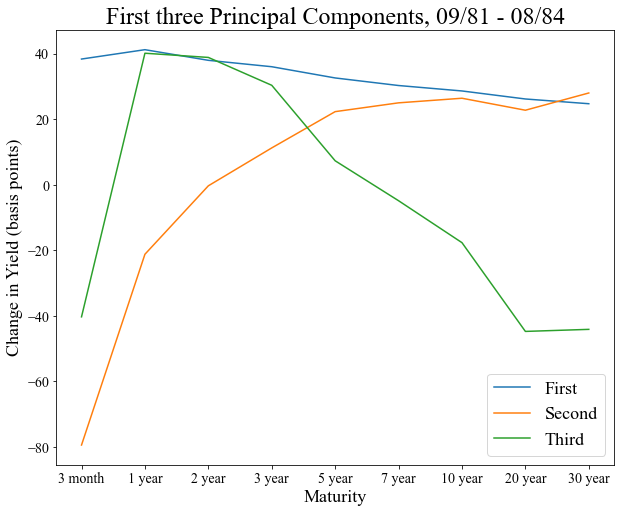

In [265]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(first_pc, label='First')
plt.plot(second_pc, label='Second')
plt.plot(third_pc, label='Third')
plt.ylabel("Change in Yield (basis points)", fontsize=18)
plt.title("First three Principal Components, 09/81 - 08/84", 
          fontsize=24)
plt.xlabel("Maturity", fontsize=18)
plt.legend(fontsize=18)
ax.tick_params(axis='both', labelsize=14)
plt.savefig('./pc.png')
plt.show()

In [247]:
three_pc_var = np.var(np.matmul(pca.transform(yc_monthly.iloc[:36]), pca.components_), axis=0)
two_pc_var = np.var(np.matmul(pca.transform(yc_monthly.iloc[:36])[:, 0:2], pca.components_[0:2]), axis=0)
one_pc_var = np.var(np.matmul(pca.transform(yc_monthly.iloc[:36])[:, 0:1], pca.components_[0:1]), axis=0)

In [248]:
var_all = np.var(yc_monthly.iloc[:36], axis=0)

In [253]:
rrrr = pd.DataFrame((one_pc_var/var_all, two_pc_var/var_all, three_pc_var/var_all)).T

In [254]:
rrrr

,0,1,2
GS3M,0.910455,0.996528,0.999909
GS1,0.990469,0.996252,0.999413
GS2,0.996239,0.996241,0.999751
GS3,0.994976,0.997115,0.999493
GS5,0.988917,0.999140,0.999307
GS7,0.984254,0.999047,0.999132
GS10,0.979877,0.998267,0.999524
GS20,0.972586,0.988785,0.998352
GS30,0.961294,0.988489,0.998787


In [257]:
(rrrr[1] - rrrr[0]) * 100

GS3M    8.607257
GS1     0.578344
GS2     0.000158
GS3     0.213902
GS5     1.022214
GS7     1.479252
GS10    1.839036
GS20    1.619941
GS30    2.719492
dtype: float64

In [258]:
(rrrr[2] - rrrr[1])*100

GS3M    0.338186
GS1     0.316094
GS2     0.351032
GS3     0.237775
GS5     0.016783
GS7     0.008564
GS10    0.125631
GS20    0.956609
GS30    1.029867
dtype: float64

In [260]:
pca.explained_variance_ratio_.sum()

0.9994099529635625

# Fit for Recession Predictors 

## Single Variable

In [428]:
recession_time = prediction.index[new_df['USRECQ'] == 1]
first = [recession_time[0], recession_time[1]]
second = [recession_time[2], recession_time[4]]
third = [recession_time[5], recession_time[10]]
fourth = [recession_time[11], prediction.index[-1]]

In [429]:
new_df = df.iloc[520:].copy()
df_yield_curve = new_df[['r3M', 'r1Y', 'r2Y', 'r3Y','r5Y', 'r7Y','r10Y', 'r20Y', 'r30Y']]

In [430]:
pca_yc = pd.DataFrame(pca.transform(df_yield_curve), columns=['pca1', 'pca2', 'pca3'], index=df_yield_curve.index)
new_df = pd.concat([new_df, pca_yc], axis=1)
new_df

,Spread,USRECQ,M1SL,M2SL,TB3MS,TB6MS,GDPC1,r3M,r1Y,r2Y,...,r7Y,r10Y,r20Y,r30Y,NYSE_return,SP500_return,DJIA_return,pca1,pca2,pca3
DATE,,,,,,,,,,,,,,,,,,,,,
1984-09-30,1.72,0.0,541.0,2230.4,10.320000,10.533333,7686.059,10.80,11.58,12.20,...,12.60,12.52,15.07,12.40,NaN,NaN,NaN,1.255858,0.334251,-1.065649
1984-12-31,3.16,0.0,547.5,2281.4,8.803333,8.986667,7749.151,8.34,9.33,10.18,...,11.45,11.50,13.73,12.69,NaN,NaN,NaN,-3.417329,1.465041,-1.701272
1985-03-31,3.03,0.0,563.6,2354.1,8.183333,8.430000,7824.247,8.83,9.86,10.71,...,11.82,11.86,13.75,12.96,-0.022312,-0.022312,-0.022312,-2.199705,1.385017,-1.508172
1985-06-30,2.98,0.0,575.1,2389.5,7.460000,7.656667,7893.136,7.18,7.80,8.69,...,10.08,10.16,14.18,14.67,0.071054,0.071054,0.071054,-6.272026,2.178193,-3.763754
1985-09-30,3.04,0.0,596.2,2444.0,7.106667,7.263333,8013.674,7.33,8.07,8.98,...,10.24,10.37,12.16,13.45,0.019934,0.019934,0.019934,-6.531181,1.378222,-2.093741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.29,1.0,3947.4,15251.2,1.576667,1.570000,19253.959,1.57,1.55,1.61,...,1.79,1.86,2.16,2.30,0.044731,0.044731,0.044731,-30.028039,-5.079912,3.110866
2020-03-31,0.57,1.0,4003.1,15446.9,1.110000,1.093333,19010.848,0.30,0.33,0.45,...,0.78,0.87,1.26,1.46,-0.138388,-0.138388,-0.138388,-33.252553,-5.132916,3.256958
2020-06-30,0.57,1.0,5035.3,17868.6,0.143333,0.166667,17302.511,0.16,0.18,0.19,...,0.55,0.73,1.27,1.49,0.085543,0.085543,0.085543,-33.748712,-5.160124,3.067134


In [431]:
np.set_printoptions(3)
results = []
variables = ['pca1', 'pca2', 'pca3', 'M1SL', 'M2SL', 'SP500_return', 'NYSE_return', 'DJIA_return']
for var in variables:
    tvalues = []
    params = []
    prsquareds = []
    names = []

    for i in range(1, 6):
        df_temp = new_df.copy()
        df_temp['y'] = df_temp.USRECQ.shift(-i)
        probitfit = sm.probit(formula = 'y ~ USRECQ + ' + var, 
                              data = df_temp).fit(disp=0)
        names.append(var)
        tvalues.append(probitfit.tvalues[var])
        pval = probitfit.pvalues[var]
        stars = 0
        if pval < 0.001:
            stars = 3
        elif pval < 0.01:
            stars = 2
        elif pval < 0.05:
            stars = 1
        params.append(str(probitfit.params[var].round(4)) + '*' * stars)
        #params.append(probitfit.params[var])
        prsquareds.append('(' + str(probitfit.prsquared.round(4)) + ')')
    df_temp = pd.DataFrame((params, prsquareds), index=[var, ''], 
                           columns=['k=3', 'k=6', 'k=9', 'k=12', 'k=15'])
    results.append(df_temp)
result_df = pd.concat(results)
result_df.index=[r'$PC_1$', '', r'$PC_2$','', r'$PC_3$', '', 
                 r'$M1$','', r'$M2$','', r'$R_{SP500}$', '', 
                 r'$R_{NYSE}$', '' , r'$R_{DJIA}$', '']
result_df.columns=[r'$k=3$', r'$k=6$', r'$k=9$', r'$k=12$', r'$k=15$']

In [432]:
result_df

,$k=3$,$k=6$,$k=9$,$k=12$,$k=15$
$PC_1$,-0.0029,0.0015,0.0012,0.0052,0.0106
,(0.4571),(0.1608),(0.0326),(0.009),(0.0036)
$PC_2$,-0.7007*,-0.8018**,-1.0163***,-1.0537***,-0.935***
,(0.5729),(0.3766),(0.3522),(0.3438),(0.3065)
$PC_3$,0.5503,0.6523**,0.7736**,0.84***,0.8309***
,(0.5197),(0.284),(0.2131),(0.2156),(0.2218)
$M1$,0.0002,0.0002,0.0002,0.0001,0.0001
,(0.4642),(0.1711),(0.0441),(0.0177),(0.0083)
$M2$,0.0,0.0001,0.0001,0.0001,0.0001
,(0.4679),(0.1784),(0.0543),(0.0277),(0.018)


In [433]:
df_temp = new_df.copy()
df_temp['y'] = df_temp.USRECQ.shift(-1)
best_probit_model = sm.probit(formula = 'y ~ USRECQ + pca2', 
                              data = df_temp).fit(disp=0)
prediction = best_probit_model.predict(df_temp[['USRECQ', 'pca2']]).shift(1)
prediction.index = pd.to_datetime(prediction.index)

baseline_model = sm.probit(formula = 'y ~ USRECQ', 
                              data = df_temp).fit(disp=0)
base_pred = baseline_model.predict(df_temp[['USRECQ']]).shift(1)
base_pred.index = pd.to_datetime(base_pred.index)

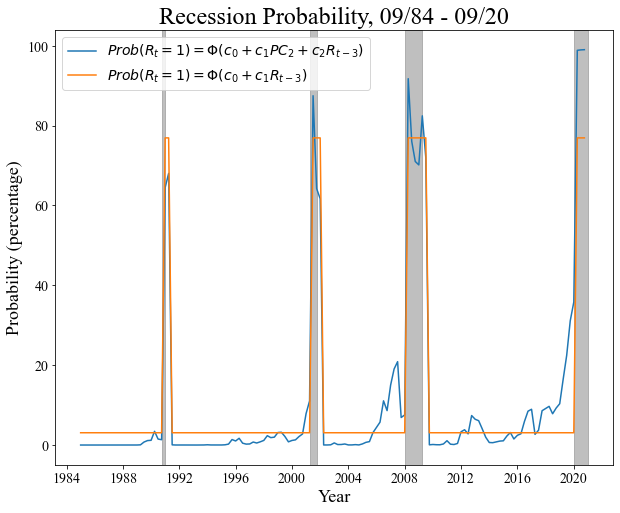

In [434]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(prediction*100, label=r'$Prob(R_t=1) = \Phi(c_0+c_1PC_2+c_2R_{t-3})$')
plt.plot(base_pred*100, label=r'$Prob(R_t=1) = \Phi(c_0+c_1R_{t-3})$')
ax.axvspan(first[0], first[1], color='grey', alpha=0.5)
ax.axvspan(second[0], second[1], color='grey', alpha=0.5)
ax.axvspan(third[0], third[1], color='grey', alpha=0.5)
ax.axvspan(fourth[0], fourth[1], color='grey', alpha=0.5)
plt.ylabel("Probability (percentage)", fontsize=18)
plt.title("Recession Probability, 09/84 - 09/20", 
          fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.legend(fontsize=14)
ax.tick_params(axis='both', labelsize=14)
plt.savefig('./rec_prob_dum.png')
plt.show()

In [435]:
np.set_printoptions(3)
results = []
variables = ['pca1', 'pca2', 'pca3', 'M1SL', 'M2SL', 'SP500_return', 'NYSE_return', 'DJIA_return']
for var in variables:
    tvalues = []
    params = []
    prsquareds = []
    names = []

    for i in range(1, 6):
        df_temp = new_df.copy()
        df_temp['y'] = df_temp.USRECQ.shift(-i)
        probitfit = sm.probit(formula = 'y ~ ' + var, 
                              data = df_temp).fit(disp=0)
        names.append(var)
        tvalues.append(probitfit.tvalues[var])
        pval = probitfit.pvalues[var]
        stars = 0
        if pval < 0.001:
            stars = 3
        elif pval < 0.01:
            stars = 2
        elif pval < 0.05:
            stars = 1
        params.append(str(probitfit.params[var].round(4)) + '*' * stars)
        #params.append(probitfit.params[var])
        prsquareds.append('(' + str(probitfit.prsquared.round(4)) + ')')
    df_temp = pd.DataFrame((params, prsquareds), index=[var, ''], 
                           columns=['k=3', 'k=6', 'k=9', 'k=12', 'k=15'])
    results.append(df_temp)
result_df = pd.concat(results)
result_df.index=[r'$PC_1$', '', r'$PC_2$','', r'$PC_3$', '', 
                 r'$M1$','', r'$M2$','', r'$R_{SP500}$', '', 
                 r'$R_{NYSE}$', '' , r'$R_{DJIA}$', '']
result_df.columns=[r'$k=3$', r'$k=6$', r'$k=9$', r'$k=12$', r'$k=15$']

In [436]:
result_df

,$k=3$,$k=6$,$k=9$,$k=12$,$k=15$
$PC_1$,-0.0222,-0.0094,-0.0023,0.0033,0.0107
,(0.0149),(0.0027),(0.0002),(0.0003),(0.0035)
$PC_2$,-0.3747**,-0.5513***,-0.7751***,-0.9211***,-0.9239***
,(0.1164),(0.1919),(0.2793),(0.3163),(0.306)
$PC_3$,0.3806*,0.5002**,0.6531**,0.7616***,0.8263***
,(0.0847),(0.1203),(0.1661),(0.1979),(0.2217)
$M1$,0.0001,0.0001,0.0001,0.0001,0.0001
,(0.007),(0.0066),(0.0068),(0.0074),(0.0083)
$M2$,0.0001,0.0001,0.0001,0.0001,0.0001
,(0.0228),(0.0212),(0.0199),(0.0187),(0.0179)


In [437]:
df_temp = new_df.copy()
df_temp['y'] = df_temp.USRECQ.shift(-4)
best_probit_model = sm.probit(formula = 'y ~ pca2', 
                              data = df_temp).fit(disp=0)
prediction = best_probit_model.predict(df_temp[['pca2']]).shift(4)
prediction.index = pd.to_datetime(prediction.index)

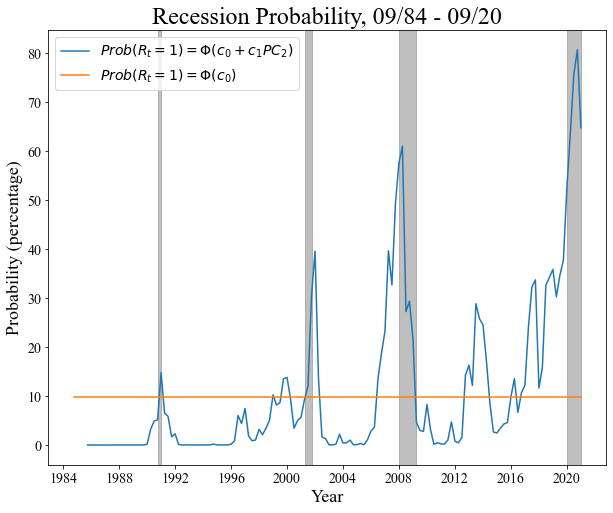

In [438]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(prediction*100, label=r'$Prob(R_t=1) = \Phi(c_0+c_1PC_2)$')
plt.plot(prediction.index, 
         np.mean(new_df['USRECQ']) * np.ones(len(prediction))*100, 
         label=r'$Prob(R_t=1) = \Phi(c_0)$')
ax.axvspan(first[0], first[1], color='grey', alpha=0.5)
ax.axvspan(second[0], second[1], color='grey', alpha=0.5)
ax.axvspan(third[0], third[1], color='grey', alpha=0.5)
ax.axvspan(fourth[0], fourth[1], color='grey', alpha=0.5)
plt.ylabel("Probability (percentage)", fontsize=18)
plt.title("Recession Probability, 09/84 - 09/20", 
          fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.legend(fontsize=14, loc='upper left')
ax.tick_params(axis='both', labelsize=14)
plt.savefig('./rec_prob_nodum.png')
plt.show()

## Double Variables (best spread variable + others)

In [439]:
np.set_printoptions(3)
results = []
variables = ['pca1', 'pca3', 'M1SL', 'M2SL', 'SP500_return', 'NYSE_return', 'DJIA_return']
for var in variables:
    tvalues = []
    params = []
    prsquareds = []
    names = []

    for i in range(1, 6):
        df_temp = new_df.copy()
        df_temp['y'] = df_temp.USRECQ.shift(-i)
        probitfit = sm.probit(formula = 'y ~ USRECQ + pca2 + ' + var, 
                              data = df_temp).fit(disp=0)
        names.append(var)
        tvalues.append(probitfit.tvalues[var])
        pval = probitfit.pvalues[var]
        stars = 0
        if pval < 0.001:
            stars = 3
        elif pval < 0.01:
            stars = 2
        elif pval < 0.05:
            stars = 1
        params.append(str(probitfit.params[var].round(4)) + '*' * stars)
        #params.append(probitfit.params[var])
        prsquareds.append('(' + str(probitfit.prsquared.round(4)) + ')')
    df_temp = pd.DataFrame((params, prsquareds), index=[var, ''], 
                           columns=['k=3', 'k=6', 'k=9', 'k=12', 'k=15'])
    results.append(df_temp)
result_df = pd.concat(results)
result_df.index=[r'$PC_2+PC_1$', '', r'$PC_2+PC_3$', '', 
                 r'$PC_2+M1$','', r'$PC_2+M2$','', r'$PC_2+R_{SP500}$', '', 
                 r'$PC_2+R_{NYSE}$', '' , r'$PC_2+R_{DJIA}$', '']
result_df.columns=[r'$k=3$', r'$k=6$', r'$k=9$', r'$k=12$', r'$k=15$']

In [440]:
pd.set_option('max_colwidth', 1000)
result_df

,$k=3$,$k=6$,$k=9$,$k=12$,$k=15$
$PC_2+PC_1$,0.0736,0.0919*,0.1107**,0.1243**,0.1386**
,(0.6086),(0.4559),(0.4632),(0.4808),(0.4732)
$PC_2+PC_3$,-0.4774,-0.4677,-0.5116,-0.3947,-0.1012
,(0.5814),(0.3883),(0.367),(0.3529),(0.3072)
$PC_2+M1$,-0.0005,-0.0006*,-0.0007**,-0.0007**,-0.0005*
,(0.6081),(0.442),(0.4409),(0.4317),(0.3767)
$PC_2+M2$,-0.0001,-0.0002*,-0.0002*,-0.0002*,-0.0001*
,(0.6057),(0.4359),(0.4345),(0.4294),(0.3754)
$PC_2+R_{SP500}$,-2.5845,-0.5085,-2.6978,-3.2335,-2.0593
,(0.577),(0.374),(0.356),(0.3502),(0.3072)


In [441]:
df_temp = new_df.copy()
df_temp['y'] = df_temp.USRECQ.shift(-1)
best_probit_model = sm.probit(formula = 'y ~ USRECQ + pca2  + pca1', 
                              data = df_temp).fit(disp=0)
prediction = best_probit_model.predict(df_temp[['USRECQ', 'pca2', 'pca1']]).shift(1)
prediction.index = pd.to_datetime(prediction.index)

baseline_model = sm.probit(formula = 'y ~ USRECQ + pca2', 
                              data = df_temp).fit(disp=0)
base_pred = baseline_model.predict(df_temp[['USRECQ', 'pca2']]).shift(1)
base_pred.index = pd.to_datetime(base_pred.index)

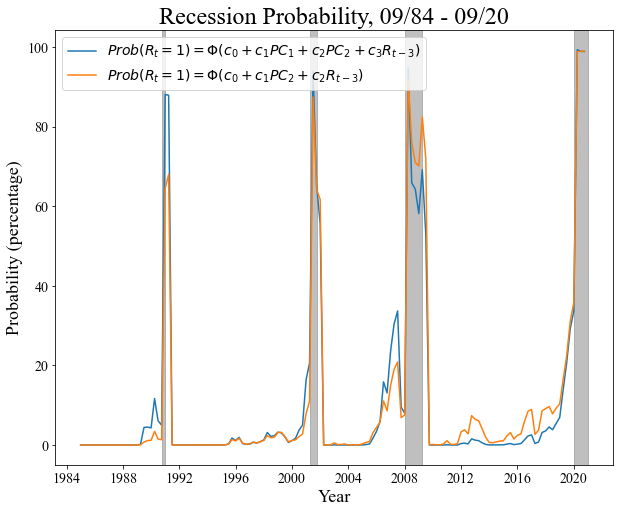

In [442]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(prediction*100, label=r'$Prob(R_t=1) = \Phi(c_0+c_1PC_1+c_2PC_2+c_3R_{t-3})$')
plt.plot(base_pred*100, label=r'$Prob(R_t=1) = \Phi(c_0+c_1PC_2+c_2R_{t-3})$')
ax.axvspan(first[0], first[1], color='grey', alpha=0.5)
ax.axvspan(second[0], second[1], color='grey', alpha=0.5)
ax.axvspan(third[0], third[1], color='grey', alpha=0.5)
ax.axvspan(fourth[0], fourth[1], color='grey', alpha=0.5)
plt.ylabel("Probability (percentage)", fontsize=18)
plt.title("Recession Probability, 09/84 - 09/20", 
          fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.legend(fontsize=14, loc='upper left')
ax.tick_params(axis='both', labelsize=14)
plt.savefig('./rec_prob_dum_double.png')
plt.show()

In [443]:
np.set_printoptions(3)
results = []
variables = ['pca1', 'pca3', 'M1SL', 'M2SL', 'SP500_return', 'NYSE_return', 'DJIA_return']
for var in variables:
    tvalues = []
    params = []
    prsquareds = []
    names = []

    for i in range(1, 6):
        df_temp = new_df.copy()
        df_temp['y'] = df_temp.USRECQ.shift(-i)
        probitfit = sm.probit(formula = 'y ~ pca2 + ' + var, 
                              data = df_temp).fit(disp=0)
        names.append(var)
        tvalues.append(probitfit.tvalues[var])
        pval = probitfit.pvalues[var]
        stars = 0
        if pval < 0.001:
            stars = 3
        elif pval < 0.01:
            stars = 2
        elif pval < 0.05:
            stars = 1
        params.append(str(probitfit.params[var].round(4)) + '*' * stars)
        #params.append(probitfit.params[var])
        prsquareds.append('(' + str(probitfit.prsquared.round(4)) + ')')
    df_temp = pd.DataFrame((params, prsquareds), index=[var, ''], 
                           columns=['k=3', 'k=6', 'k=9', 'k=12', 'k=15'])
    results.append(df_temp)
result_df = pd.concat(results)
result_df.index=[r'$PC_2+PC_1$', '', r'$PC_2+PC_3$', '', 
                 r'$PC_2+M1$','', r'$PC_2+M2$','', r'$PC_2+R_{SP500}$', '', 
                 r'$PC_2+R_{NYSE}$', '' , r'$PC_2+R_{DJIA}$', '']
result_df.columns=[r'$k=3$', r'$k=6$', r'$k=9$', r'$k=12$', r'$k=15$']

In [444]:
result_df

,$k=3$,$k=6$,$k=9$,$k=12$,$k=15$
$PC_2+PC_1$,0.0137,0.0436,0.0715*,0.096**,0.1336**
,(0.1199),(0.2228),(0.3472),(0.4208),(0.4674)
$PC_2+PC_3$,-0.1345,-0.3514,-0.519,-0.4559,-0.1087
,(0.1183),(0.2025),(0.2975),(0.329),(0.3067)
$PC_2+M1$,-0.0003,-0.0005*,-0.0006**,-0.0006**,-0.0005*
,(0.1486),(0.2535),(0.3717),(0.4084),(0.3767)
$PC_2+M2$,-0.0001,-0.0001,-0.0001*,-0.0002*,-0.0001*
,(0.1276),(0.2252),(0.3436),(0.3933),(0.3746)
$PC_2+R_{SP500}$,-10.0582***,-5.9805*,-6.0059,-4.9299,-1.9342
,(0.2957),(0.2451),(0.319),(0.3387),(0.3071)


In [448]:
df_temp = new_df.copy()
df_temp['y'] = df_temp.USRECQ.shift(-4)
best_probit_model = sm.probit(formula = 'y ~ pca2  + pca1', 
                              data = df_temp).fit(disp=0)
prediction = best_probit_model.predict(df_temp[['pca2', 'pca1']]).shift(4)
prediction.index = pd.to_datetime(prediction.index)

baseline_model = sm.probit(formula = 'y ~ pca2', 
                              data = df_temp).fit(disp=0)
base_pred = baseline_model.predict(df_temp[['pca2']]).shift(4)
base_pred.index = pd.to_datetime(base_pred.index)

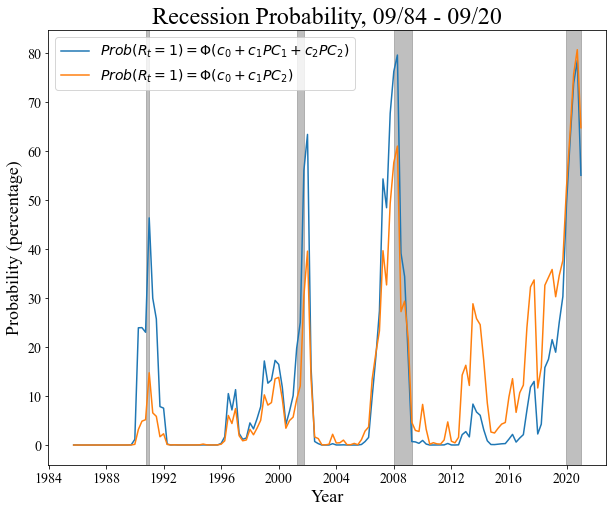

In [449]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(prediction*100, label=r'$Prob(R_t=1) = \Phi(c_0+c_1PC_1+c_2PC_2)$')
plt.plot(base_pred*100, label=r'$Prob(R_t=1) = \Phi(c_0+c_1PC_2)$')

ax.axvspan(first[0], first[1], color='grey', alpha=0.5)
ax.axvspan(second[0], second[1], color='grey', alpha=0.5)
ax.axvspan(third[0], third[1], color='grey', alpha=0.5)
ax.axvspan(fourth[0], fourth[1], color='grey', alpha=0.5)

plt.ylabel("Probability (percentage)", fontsize=18)
plt.title("Recession Probability, 09/84 - 09/20", 
          fontsize=24)
plt.xlabel("Year", fontsize=18)
plt.legend(fontsize=14, loc='upper left')
ax.tick_params(axis='both', labelsize=14)
plt.savefig('./rec_prob_nodum_double.png')
plt.show()